1/ Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [60]:
import numpy as np
X=np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y=np.array( [401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=10

In [15]:
b=(n*(X*y).sum()-(X.sum()*y.sum()))/(n*((X**2).sum())-((X.sum()**2)))
b

2.6205388824027653

In [17]:
a=y.mean()-b*X.mean()
a

444.17735732435955

In [18]:
X.mean()

101.4

In [19]:
y.mean()

709.9

In [20]:
y_hat=a+b*X

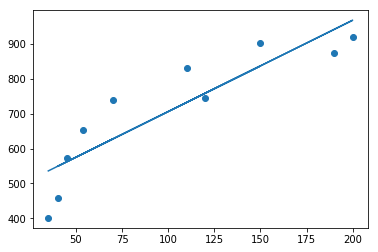

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()

In [61]:
X=X.reshape(10,1)
X=np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [62]:
y=y.reshape(10,1)

In [63]:
B=np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

2/ Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [77]:
X=np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y=np.array( [401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=10
B1=0.1
alpha=1e-5
for i in range(10000):
    B1 -=alpha*((2/n)*(B1*X-y)*X).sum()
    if i%1000==0:
        print('B1={}'.format(B1))

B1=1.6952808000000004
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688
B1=5.889820420132688


In [31]:
B1

5.889820420132673

In [32]:
((B1*X-y)**2).sum()/n

56516.85841571943

3/ В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
###Таблица Стюьдента используется когда не известна дисперсия или среднеквадратичное отклонение генерально выборки

4/*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [78]:
#y=b1*x+b0
X=np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y=np.array( [401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=10
alpha=1e-5
b_b1=0.1
b_b0=0.1
for i in range(10000000):
    b1_old=b_b1
    b_b1 -=alpha*((2/n)*(b_b1*X+b_b0-y)*X).sum()
    b_b0 -=alpha*((2/n)*(b1_old*X+b_b0-y)).sum()
    if i%1000000==0:
        print('B1={},B2={} '.format(b_b1,b_b0))


B1=1.695078,B2=0.1139932 
B1=2.6410093146294247,B2=441.396215664944 
B1=2.620667096378724,B2=444.1599379935946 
B1=2.6205396854548724,B2=444.17724822057295 
B1=2.6205388874326947,B2=444.1773566409863 
B1=2.6205388824440017,B2=444.1773573187572 
B1=2.6205388824440017,B2=444.1773573187572 
B1=2.6205388824440017,B2=444.1773573187572 
B1=2.6205388824440017,B2=444.1773573187572 
B1=2.6205388824440017,B2=444.1773573187572 


In [79]:
((b_b1*X+b_b0-y)**2).sum()/n

6470.414201176661